# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.705643e+01     1.185832e+01
 * time: 0.0016231536865234375
     1     3.680165e+01     9.901440e+00
 * time: 0.004258155822753906
     2     3.606081e+01     1.932281e+01
 * time: 0.009243965148925781
     3     2.234325e+01     3.032802e+00
 * time: 0.016225099563598633
     4     2.009561e+01     1.530916e+00
 * time: 0.021532058715820312
     5     1.928399e+01     1.594749e+00
 * time: 0.058522939682006836
     6     1.882848e+01     1.235183e+00
 * time: 0.06350111961364746
     7     1.841236e+01     1.339423e+00
 * time: 0.06722497940063477
     8     1.808951e+01     8.672320e-01
 * time: 0.07094907760620117
     9     1.781444e+01     7.972265e-01
 * time: 0.07458996772766113
    10     1.764004e+01     7.173287e-01
 * time: 0.07823514938354492
    11     1.751079e+01     5.339297e-01
 * time: 0.08243894577026367
    12     1.750143e+01     1.318632e+00
 * time: 0.08563399314880371
    13     1.746950e+01     9.391858e-01
 

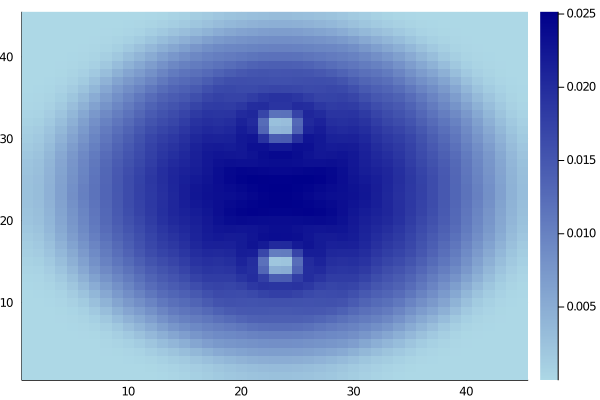

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)